In [2]:
import pandas as pd
import  numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
data=pd.read_csv('spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data=pd.DataFrame(data)

In [5]:
data.shape

(5572, 5)

### Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
data=data.rename(columns={'v1':'target',
'v2':'text'})

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['target']=le.fit_transform(data['target'])

0=**ham**
1=**Spam**

In [10]:
data.duplicated().sum()

403

In [11]:
data=data.drop_duplicates(keep='first')

## EDA

In [12]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

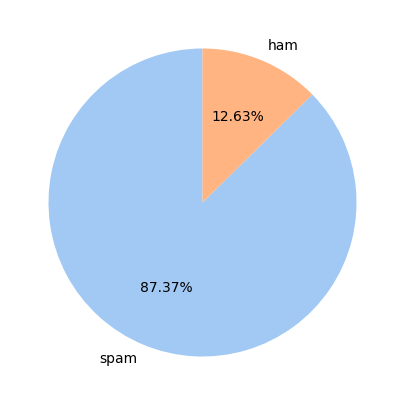

In [13]:
plt.figure(figsize=(5, 5))
plt.pie(data['target'].value_counts(),labels=['spam','ham'], autopct='%1.2f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.show()


In [14]:
import nltk

In [15]:
data['num_of_character']=data['text'].apply(len)

In [16]:
from nltk.tokenize import word_tokenize
data['num_words']=data['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [17]:
from nltk.tokenize import sent_tokenize
data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
data.describe()

,target,num_of_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


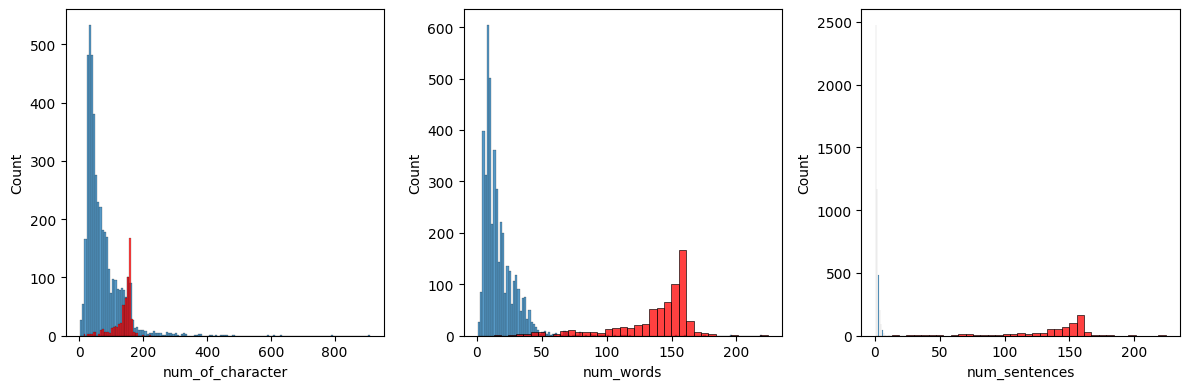

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)  # Subplot 1 (top-left)
sns.histplot(x=data[data['target'] == 0]['num_of_character'])
sns.histplot(x=data[data['target'] == 1]['num_of_character'],color='red')
# plt.legend()

plt.subplot(1, 3, 2)  # Subplot 2 (top-right)
sns.histplot(x=data[data['target'] == 0]['num_words'])
sns.histplot(x=data[data['target'] == 1]['num_of_character'],color='red')

plt.subplot(1, 3, 3)  # Subplot 3 (bottom-left)
sns.histplot(x=data[data['target'] == 0]['num_sentences'])
sns.histplot(x=data[data['target'] == 1]['num_of_character'],color='red',legend=True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


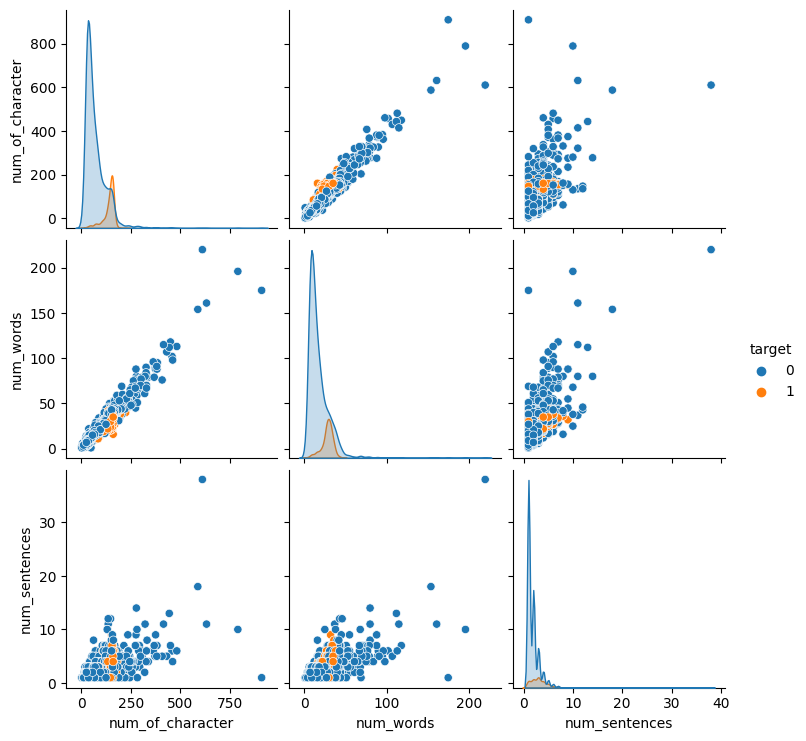

In [20]:
sns.pairplot(data=data,hue='target')
plt.show()

<Axes: >

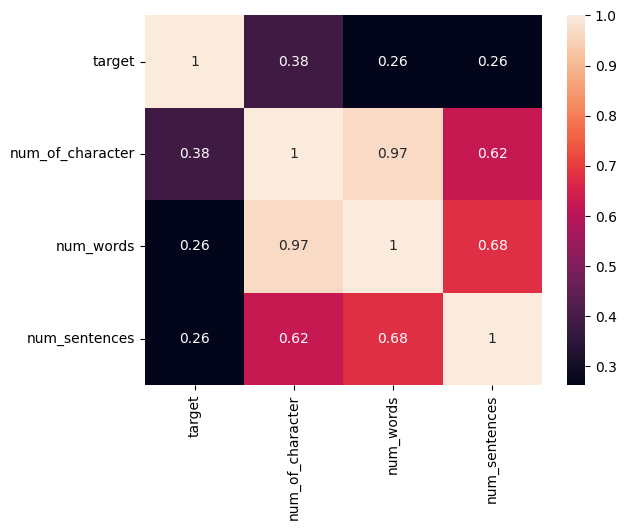

In [21]:
int_columns = data.select_dtypes(include=['int', 'float64'])
sns.heatmap(int_columns.corr(),annot=True)

### Text Preprocessing
- Lower Case
- Tokanization 
- Removing Special Charactres
- Steaming

In [22]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps=PorterStemmer()
import re

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y) 

In [25]:
data['transformed_text']=data['text'].apply(transform_text)

In [26]:
data.head()

,target,text,num_of_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [27]:
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=12,background_color='white')


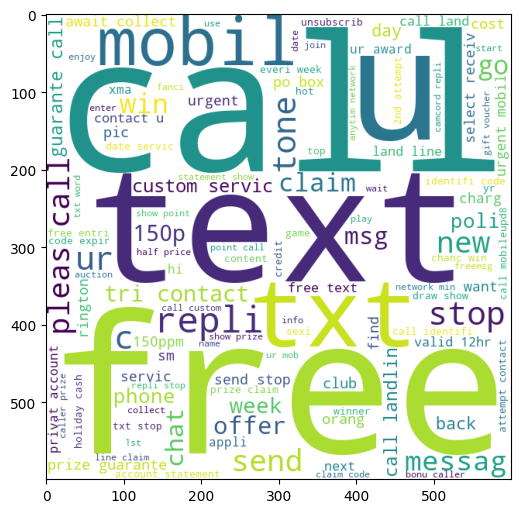

In [28]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(6,16))
plt.imshow(spam_wc)
plt.show()

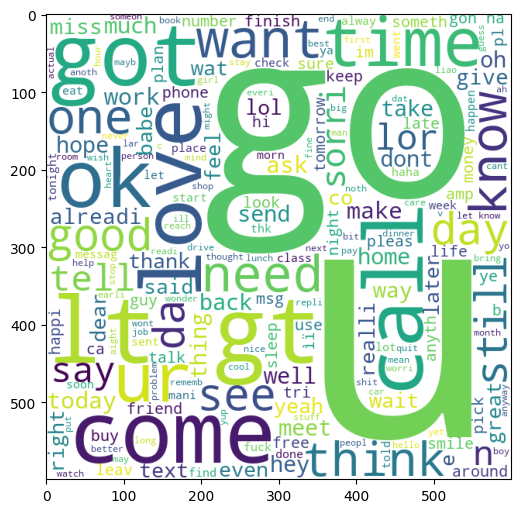

In [29]:
hem_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(6,16))
plt.imshow(spam_wc)
plt.show()

In [30]:
spam_corpus=[]
for mass in data[data['target']==1]['transformed_text'].tolist():
    for word in mass.split():
        spam_corpus.append(word)

In [31]:
from collections import  Counter
freq_word=pd.DataFrame(Counter(spam_corpus).most_common(20))

In [32]:
freq_word

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


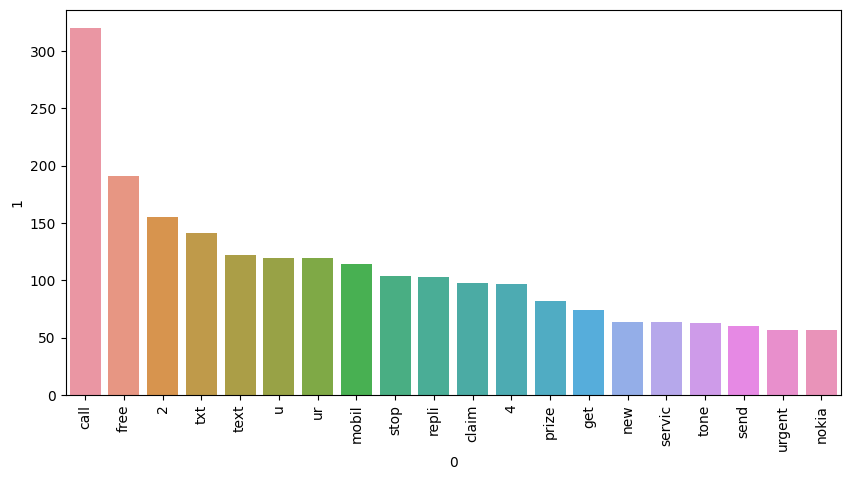

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=freq_word[0],y=freq_word[1])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
ham_corpus=[]
for mass in data[data['target']==0]['transformed_text'].tolist():
    for word in mass.split():
        ham_corpus.append(word)

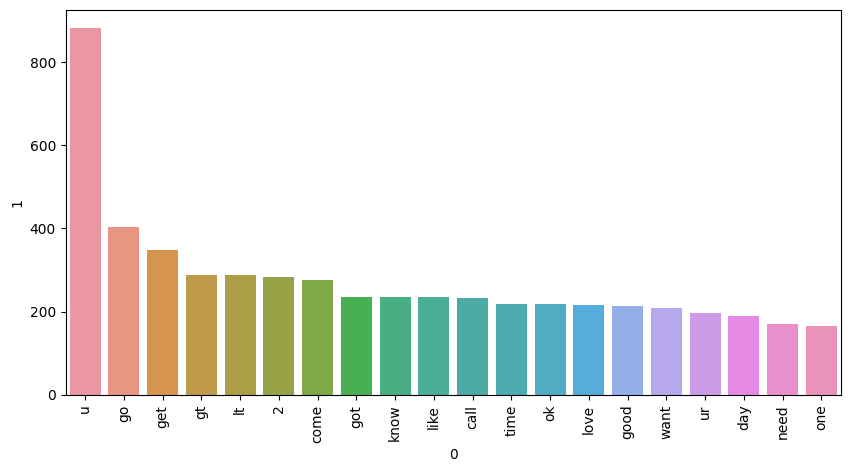

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(20))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [66]:
X=tfidf.fit_transform(data['transformed_text']).toarray()

In [67]:
X.shape

(5169, 6708)

In [68]:
y=data['target'].values

In [69]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

#### GaussianNB

In [71]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_gnb))
print('--'*10)
print('confusion metrics : \n',confusion_matrix(y_test,y_pred_gnb))
print('--'*10)
print('precision score :',precision_score(y_test,y_pred_gnb))

Accuracy score : 0.8762088974854932
--------------------
confusion metrics : 
 [[793 103]
 [ 25 113]]
--------------------
precision score : 0.5231481481481481


#### MultinomialNB

In [72]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_mnb))
print('--'*10)
print('confusion metrics : \n',confusion_matrix(y_test,y_pred_mnb))
print('--'*10)
print('precision score :',precision_score(y_test,y_pred_mnb))

Accuracy score : 0.9593810444874274
--------------------
confusion metrics : 
 [[896   0]
 [ 42  96]]
--------------------
precision score : 1.0


#### BernoulliNB

In [73]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,y_pred_bnb))
print('--'*10)
print('confusion metrics : \n',confusion_matrix(y_test,y_pred_bnb))
print('--'*10)
print('precision score :',precision_score(y_test,y_pred_bnb))

Accuracy score : 0.9700193423597679
--------------------
confusion metrics : 
 [[893   3]
 [ 28 110]]
--------------------
precision score : 0.9734513274336283


**In this case precision score matters more then accuracy so we select BernoulliNB and TFIDF , because it has higher precision score**

In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

pickle.dump(mnb,open("model.pkl",'wb'))